In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing dataset

column_names = [
        'Longitudinal position of the center of buoyancy',
        'Prismatic coefficient', 
        'Length-displacement ratio', 
        'Beam-draft ratio',
        'Length-beam ratio',
        'Froude number',
        'Residuary resistance per unit weight of displacement'
        ]

dataset = pd.read_csv('yacht_hydrodynamics.data.csv', sep = ' ',
                      names = column_names)

dataset.head(5)

,Longitudinal position of the center of buoyancy,Prismatic coefficient,Length-displacement ratio,Beam-draft ratio,Length-beam ratio,Froude number,Residuary resistance per unit weight of displacement
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [3]:
# Defining independent variable X and dependent variable y

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 6].values

In [4]:
# Taking care of missing data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X[:, [1]] = imputer.fit_transform(X[:, [1]])

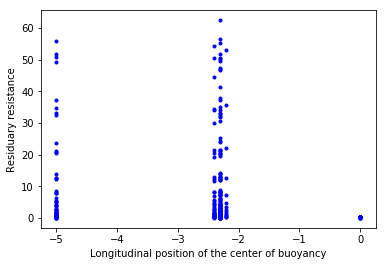

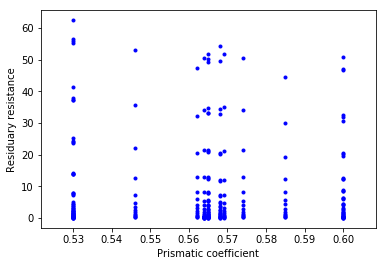

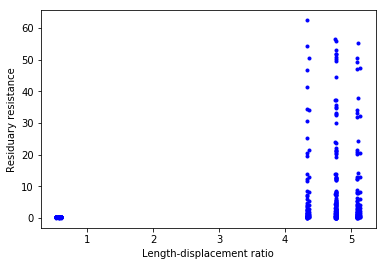

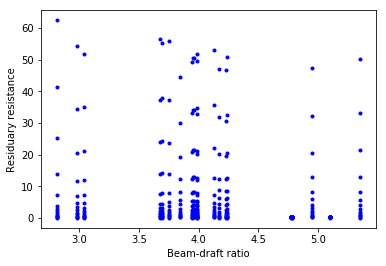

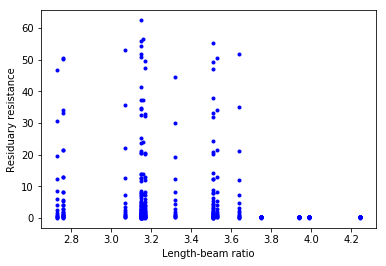

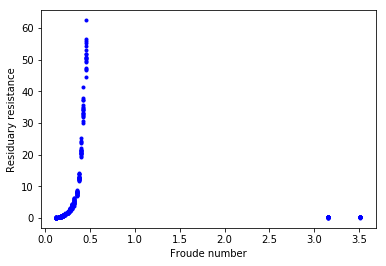

In [5]:
# Visualising residuary resistance against individual features

for i in range(6):   
    plt.scatter(X[:, i], y, color = 'blue', marker = '.')
    plt.xlabel(column_names[i])
    plt.ylabel("Residuary resistance")
    plt.show()

In [6]:
# Splitting data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 0)

In [7]:
# Fitting training set to the regressor

from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
# Predicting test set results

y_pred = rfr_model.predict(X_test)

In [9]:
# Calculating mean absolute error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.2932501056419598